In [1]:
# Import some useful packages

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load camb

import camb

In [3]:
# Define cosmological parameters

H0 = 67
ombh2 = 0.022
omch2 = 0.12
tau = 0.055
As = 2.1e-9
ns = 0.965

# Section 1 : Plot the CMB temperature and polarization power spectra

In [4]:
# Create a CAMB params object

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000)

In [5]:
# Compute results and get TT and EE power spectra

results = camb.get_results(pars)
powers = results.get_cmb_power_spectra()

Help: get_cmb_power_spectra returns a dictionary containing the power spectra with keys
    - total
    - unlensed_scalar
    - unlensed_total
    - lensed_scalar
    - tensor
    - lens_potential
The cl arrays are then ordered in the following order: TT, EE, BB, TE.

<IPython.core.display.Javascript object>


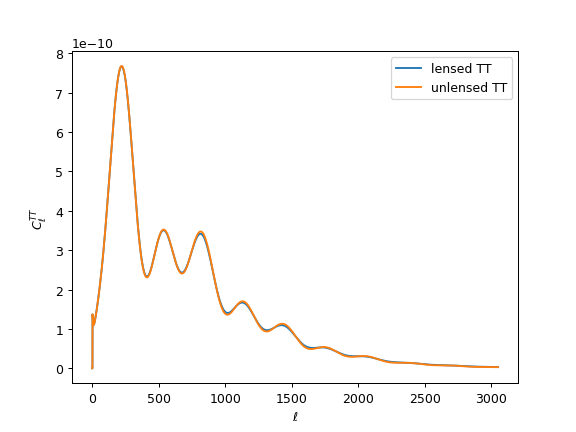

<IPython.core.display.Javascript object>


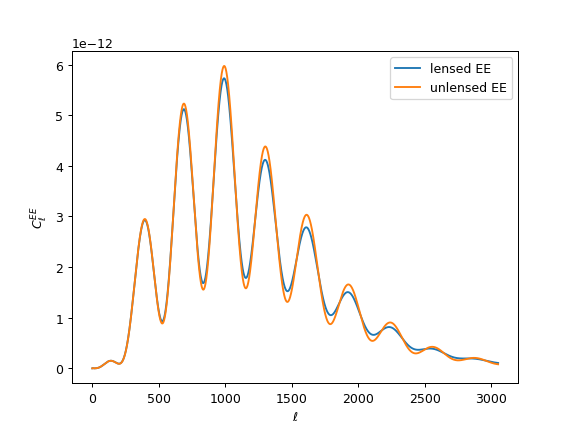

Text(0, 0.5, '$C_\\ell^{EE}$')

In [6]:
# Plot the CMB temperature and EE polarization power spectra
# Compare the lensed and unlensed spectra

ls = np.arange(powers['total'].shape[0])

# Plot TT
plt.figure()
plt.plot(ls,powers['total'][:,0], label="lensed TT")
plt.plot(ls, powers['unlensed_total'][:,0], label="unlensed TT")
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$")

# Plot EE
plt.figure()
plt.plot(ls,powers['total'][:,1], label="lensed EE")
plt.plot(ls, powers['unlensed_total'][:,1], label="unlensed EE")
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{EE}$")

# Section 2 : Plot the (linear and non-linear) matter power spectrum

In [7]:
# Create a CAMB params object and choose the redshifts (2 to 5 values) and scales 
# at which you want to compute the matter power spectrum

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000, nonlinear=0)
pars.set_matter_power(redshifts=[0., 1., 2., 3.], kmax=1.0)
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


In [8]:
# Same but non-linear

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000, nonlinear=1)
pars.set_matter_power(redshifts=[0., 1., 2., 3.], kmax=1.0)
results = camb.get_results(pars)
kh, z, pk_nonlinear = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


<IPython.core.display.Javascript object>


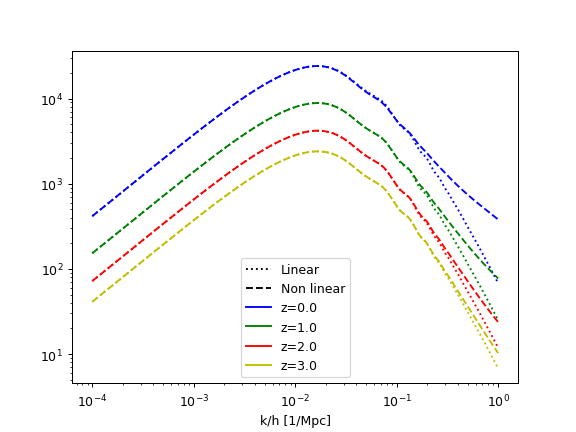

Text(0.5, 0, 'k/h [1/Mpc]')

In [9]:
# Plot the linear and non-linear power spectra at the redshifts chosen

from matplotlib.lines import Line2D

color = ['b', 'g', 'r', 'y', 'o']
linear = Line2D([0], [0], color='black', linestyle=':')
non_linear = Line2D([0], [0], color='black', linestyle='--')
curves = [linear, non_linear]
labels = ['Linear', 'Non linear']

plt.figure()
for k in range(len(pk)):
    plt.loglog(kh,pk[k], c=color[k], ls=':')
    plt.loglog(kh,pk_nonlinear[k], c=color[k], ls='--')
    z_k = Line2D([0], [0], color=color[k])
    curves.append(z_k)
    labels.append(f'z={z[k]}')

# Add a legend with the custom lines
plt.legend(curves, labels)
plt.xlabel('k/h [1/Mpc]')

# Section 3: Compute galaxy power spectra

Let's assume that we have performed a galaxy survey. Those galaxies were observed in three different redshift bins and their redshift distribution can be modeled through Gaussians with means 0.2, 0.4, 0.6 and standard-deviations 0.05, 0.1, 0.12. Can you compute the galaxy power spectrum in each bin using CAMB?

Help: To do so, you need to provide the galaxy kernel in each redshift bin. A galaxy kernel is simply the galaxy normalized (i.e. the integral over redshift must be 1) redshift distribution. The kernels can be provided to CAMB through the pars.SourceWindows field. This field expects a list, which in our case will be a list of SplinesSourceWindow objects, which can be constructed by specifying the redshift array z and the corresponding kernel W.

Finally, the power spectra can be obtained using the get_source_cls_dict() object from the results object. The method will return a list of spectra containing the power spectra for the three redshift bins ("W1xW1", "W2xW2", "W3xW3") as well as the power spectrum of the CMB lensing deflection angle ("PxP") and all the possible cross-correlations between the galaxy bins and the CMB lensing deflection angle.

In [10]:
z = np.linspace(0, 1, 100)
dN_dz1 = np.exp(-((z-0.2)/0.05)**2)
dN_dz2 = np.exp(-((z-0.4)/0.1)**2)
dN_dz3 = np.exp(-((z-0.6)/0.12)**2)

# Normalize dN/dz to get W(z)
W1 = dN_dz1 / np.trapz(dN_dz1, z)
W2 = dN_dz2 / np.trapz(dN_dz2, z)
W3 = dN_dz3 / np.trapz(dN_dz3, z)

<IPython.core.display.Javascript object>


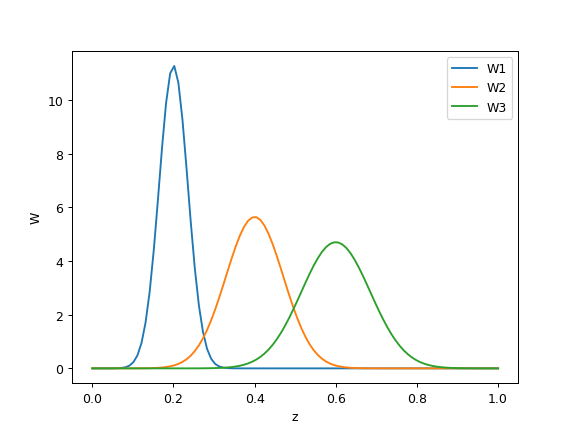

In [11]:
plt.figure()
plt.plot(z,W1, label="W1")
plt.plot(z,W2, label="W2")
plt.plot(z,W3, label="W3")
plt.xlabel("z")
plt.ylabel("W")
plt.legend()

In [12]:
# Provide the kernels to CAMB and compute the power spectra

from camb.sources import SplinedSourceWindow

source_windows = [SplinedSourceWindow(z=z, W=W1), 
                  SplinedSourceWindow(z=z, W=W2),
                  SplinedSourceWindow(z=z, W=W3)]

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000)

# Assign the source window to the parameters
pars.SourceWindows = source_windows

# Calculate results
results = camb.get_results(pars)
cls = results.get_source_cls_dict()

<IPython.core.display.Javascript object>


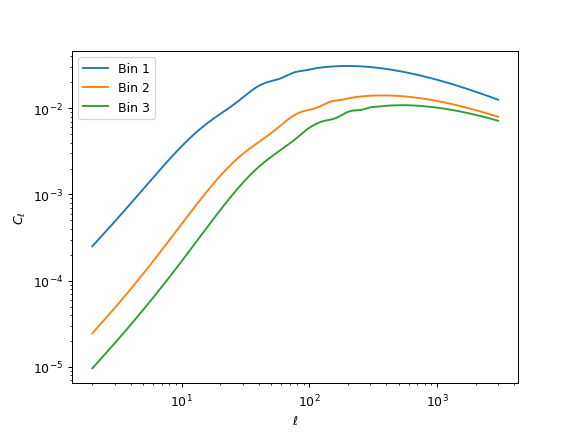

Text(0, 0.5, '$C_\\ell$')

In [13]:
# Plot the power spectra

lmax = 3000
ls = np.arange(2, lmax)

plt.figure()
plt.loglog(ls, cls['W1xW1'][2:lmax], label='Bin 1')
plt.loglog(ls, cls['W2xW2'][2:lmax], label='Bin 2')
plt.loglog(ls, cls['W3xW3'][2:lmax], label='Bin 3')
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

# Section 4 : Compute angular and comoving distances

In [14]:
# Create a CAMB params object

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns)

# Get results (here get_background is enough because we do not compute any power spectrum)

results = camb.get_background(pars)

<IPython.core.display.Javascript object>


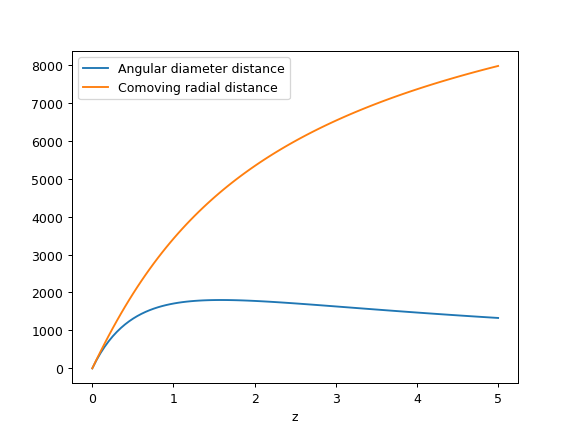

In [15]:
# Set a redshift array and compute corresponding angular diameter and comoving distances

z = np.linspace(0,5,100)
DA = results.angular_diameter_distance(z)
chi = results.comoving_radial_distance(z)

plt.figure()
plt.plot(z, DA, label="Angular diameter distance")
plt.plot(z, chi, label="Comoving radial distance")
plt.xlabel('z')
plt.legend()

## Towards dark energy:
Plot the angular diameter distance as a function of redshift for different dark energy equation of state parameters

<IPython.core.display.Javascript object>


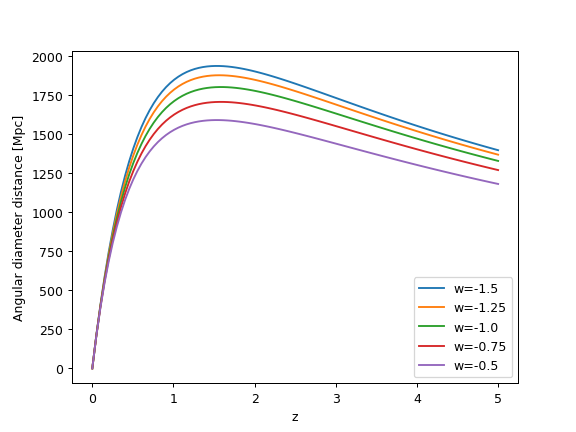

Text(0, 0.5, 'Angular diameter distance [Mpc]')

In [16]:
ws = np.linspace(-1.5, -0.5, 5)

plt.figure()

for w in ws:
    pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, 
                          w=w, wa=0, dark_energy_model='fluid')
    
    results = camb.get_background(pars)
    
    z = np.linspace(0,5,100)
    DA = results.angular_diameter_distance(z)


    plt.plot(z, DA, label=f'w={w}')
plt.legend()
plt.xlabel('z')
plt.ylabel('Angular diameter distance [Mpc]')

# Bonus section: custom dark energy model

Create an array w(a) for the dark energy equation of state parameter evolution as a function of scale factor a. Then plot the CMB power spectrum for this dark energy model and compare it with the standard LCDM case. 

In [17]:
# Define how w evolves with a 
# beware w cannot "cross" -1 but should probably stay relatively 
# close to -1 if one wanted to fit the CMB power spectrum well.

a = np.linspace(0.1,1,100)
w = -0.9*np.ones_like(a)+0.1*np.sin(a*10)

<IPython.core.display.Javascript object>


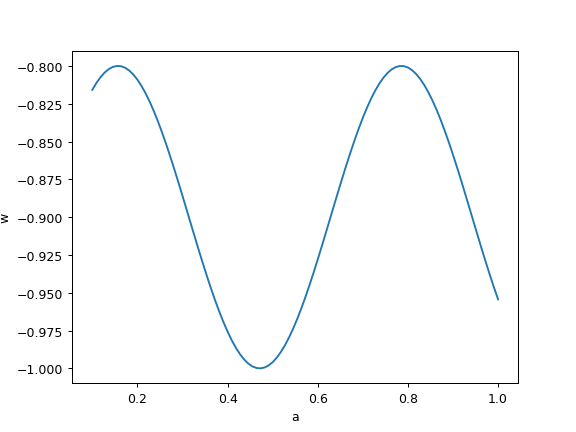

<IPython.core.display.Javascript object>


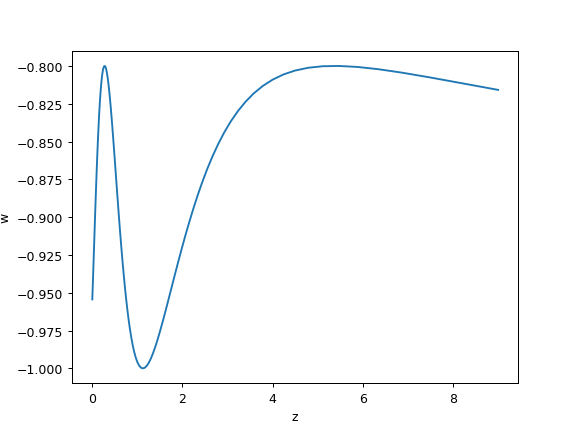

Text(0, 0.5, 'w')

In [18]:
# Plot this w as a function of a and/or z

plt.figure()
plt.plot(a,w)
plt.xlabel("a")
plt.ylabel("w")

plt.figure()
plt.plot(1/a-1,w)
plt.xlabel("z")
plt.ylabel("w")

In [19]:
# Create a dark energy object

DE = camb.dark_energy.DarkEnergyFluid()
DE.set_w_a_table(a,w)

In [20]:
# Create a CAMB params object and provide the dark energy object

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000)
pars.DarkEnergy = DE

In [21]:
# Compute results and get power spectra

results = camb.get_results(pars)
powers = results.get_cmb_power_spectra()

In [22]:
# Get the LCDM power spectrum

pars = camb.set_params(H0=H0, ombh2=ombh2, omch2=omch2, tau=tau, As=As, ns=ns, lmax=3000)
results = camb.get_results(pars)
powers_LCDM = results.get_cmb_power_spectra()

<IPython.core.display.Javascript object>


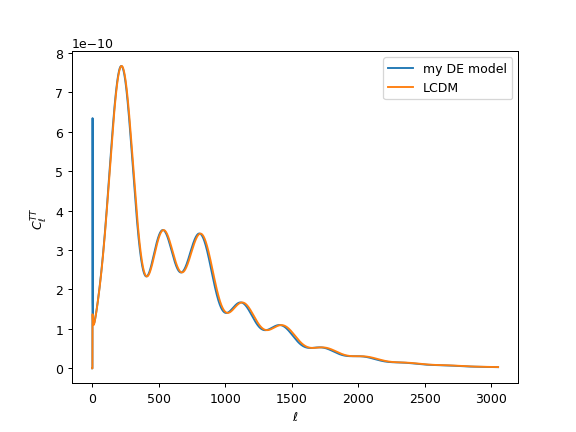

<IPython.core.display.Javascript object>


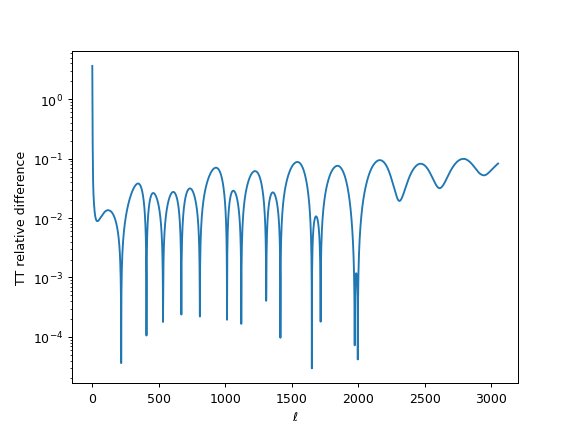

<IPython.core.display.Javascript object>


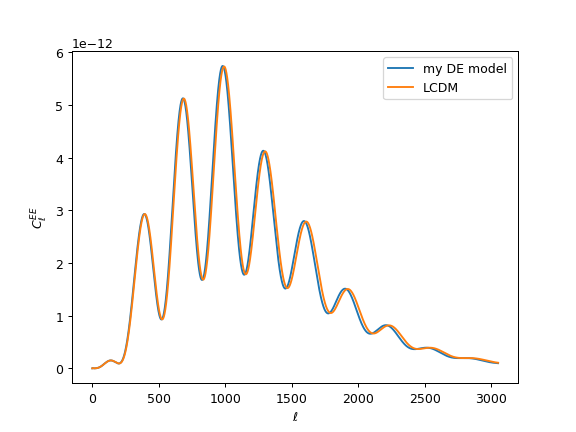

<IPython.core.display.Javascript object>


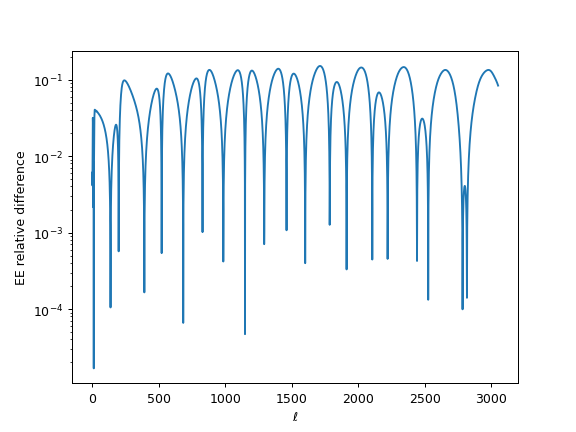

Text(0, 0.5, 'EE relative difference')

In [23]:
# Plot the power spectra and compare with LCDM

ls = np.arange(powers['total'].shape[0])

# Plot TT
plt.figure()
plt.plot(ls,powers['total'][:,0], label="my DE model")
plt.plot(ls,powers_LCDM['total'][:,0], label="LCDM")
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{TT}$")

plt.figure()
plt.plot(ls[2:],np.abs(powers['total'][2:,0]-powers_LCDM['total'][2:,0])/powers_LCDM['total'][2:,0])
plt.semilogy()
plt.xlabel(r"$\ell$")
plt.ylabel("TT relative difference")

# Plot EE
plt.figure()
plt.plot(ls,powers['total'][:,1], label="my DE model")
plt.plot(ls,powers_LCDM['total'][:,1], label="LCDM")
plt.legend()
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell^{EE}$")

plt.figure()
plt.plot(ls[2:],np.abs(powers['total'][2:,1]-powers_LCDM['total'][2:,1])/powers_LCDM['total'][2:,1])
plt.semilogy()
plt.xlabel(r"$\ell$")
plt.ylabel("EE relative difference")